In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Data Preprocessing and Visualisation


In [2]:
p = Path("./Data_set/")

# let us see what all subfolders in Data_set
dirs = p.glob("*") # * gives everything in the path
# for d in dirs:
#     print(d)

image_data = []
labels = []
label_dict = {"Pikachu": 0, "Bulbasaur": 1, "Meowth":2}
label2pokemon = {0:"Pikachu", 1:"Bulbasaur", 2:"Meowth"}

#optional 
image_path = []
for folder_dir in dirs:
    #print(str(folder_dir).split("\\")[-1]) #first converting folder name into string type and splitting the name from '\'
    label = str(folder_dir).split("\\")[-1]
    #print(label)
    # we need to go to every folder and extract all the images
    
    cnt = 0
    print(folder_dir)
    # iterate over all directory and pick all images of pokemon
    for img_path in folder_dir.glob("*.jpg"):
        #print(img_path)
        #we are going to change size of image so that every image is of same size
        img = image.load_img(img_path, target_size = (40, 40))  # now size of each image will be of 100 x 100
        
        # now we want to convert this img to an array
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        
        # we are going to append label of each image
        labels.append(label_dict[label])
        
        cnt += 1
        
    print(cnt)
        
        
        
    
    

Data_set\Bulbasaur
176
Data_set\Meowth
70
Data_set\Pikachu
199


In [3]:
#Visualisation

import numpy as np

print(len(image_data))
print(len(labels))

445
445


In [4]:
print(labels)
print(type(labels))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:
import random
random.seed(10)

In [6]:
X = np.array(image_data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

# shuffle our data

from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state = 2)

# Normalisation
X = X/255.0  # we want to keep X each pixal value into the range of 0 to 1

(445, 40, 40, 3)
(445,)


In [7]:
print(Y)

[0 2 0 0 2 1 0 0 1 2 0 2 1 0 0 1 1 0 0 2 1 1 2 2 2 0 0 0 1 0 2 0 1 1 1 0 1
 2 0 0 0 0 2 0 1 0 0 2 0 1 1 0 0 2 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 2 1 0 0 1 1 0 1 1 2 0 0 0 0 0 1 0 2 1 1 1 0 1 2 0 2 2 1 2 0 1 0 1
 1 2 1 1 0 0 2 1 0 1 0 1 1 2 0 1 2 1 2 0 2 0 0 1 0 0 0 1 1 0 0 2 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 1 0 0 1 2 1 2 0 1 2 1 2 0 0 1 2 2 1 1 0 0 2 1 1 0 0 1 1
 1 0 0 0 2 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 2 1 0 0 2 1 2 2 1 1 0 2 0 0 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 2 0 2 1 2 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 2 1 2 1 0 1 0 1 0 0 2 2 0 0 2 0 1 1 0 0 0 1 1 1 1 0 0 0 2 0 1
 0 0 1 1 0 0 0 2 2 1 0 0 0 0 0 1 1 0 0 0 0 2 0 0 1 2 0 1 0 1 0 1 2 1 1 1 0
 0 2 2 1 2 0 0 0 1 1 0 1 2 0 2 0 1 1 0 1 2 0 2 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 2 1 0 0 0 2 0 1 0 1 2 0 0 1 1 2 1 1 1 1 2 0
 0 2 1 0 0 0 0 1 1 1 0 1 0 0 1 2 1 0 1 1 0 2 0 0 1 2 0 1 0 1 0 0 1 0 1 1 1
 1]


In [8]:
# Draw some pokemons
def drawImg(img, label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.show()
    

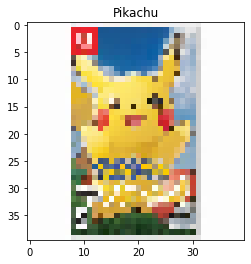

In [9]:
drawImg(X[0], Y[0])

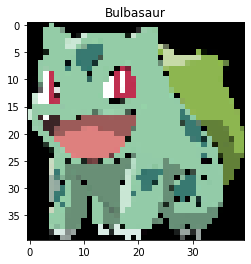

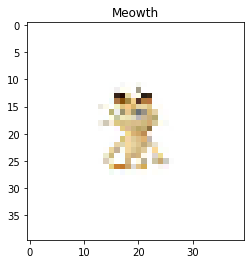

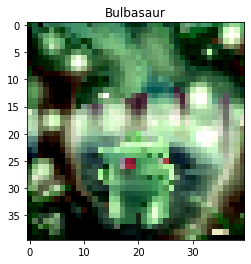

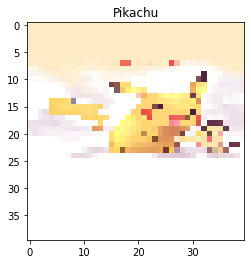

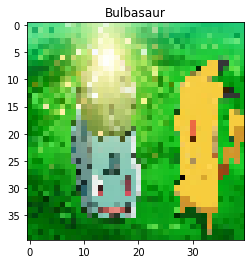

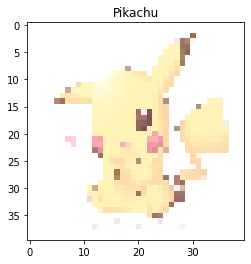

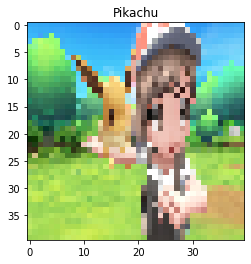

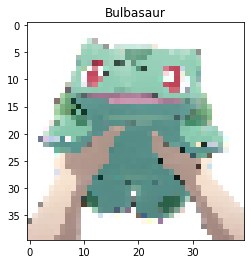

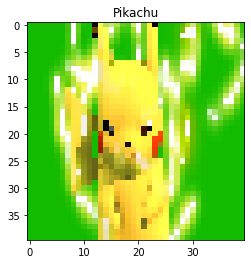

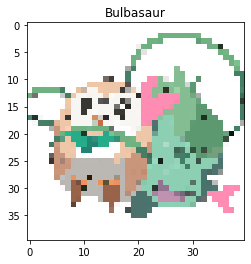

In [10]:
for i in range (10) :
    r = np.random.randint(400)
    drawImg(X[r],Y[r])

In [11]:
# creating training and testing data set
split = int(X.shape[0]*0.8)
print(split)
X_ = np.array(X)
Y_ = np.array(Y)

# training set
X = X_[:split,:]
Y = Y_[:split]

#test set
XTest = X_[split:,]
YTest = Y_[split:]

print(X_.shape)
print(X.shape, Y.shape)
print(XTest.shape, YTest.shape)

356
(445, 40, 40, 3)
(356, 40, 40, 3) (356,)
(89, 40, 40, 3) (89,)


In [12]:
def softmax(a):
  e_pa = np.exp(a) # if a is scalar it will give scalar and if a is vector it will give vector in which it will do exponential of each element
  ans = e_pa/np.sum(e_pa, axis = 1, keepdims=True) #keepdims keeps it in its format
  return ans

# ANN model

In [13]:
class NeuralNetwork:
  #we are going to define constructor
  def __init__(self, input_size, layers, output_size):

    np.random.seed(0) 

    model = {}  # dictionary
 
    # First layer
    model['w1'] = np.random.randn(input_size, layers[0])  #randn does random initialisation from noral distribution
    model['b1'] = np.zeros((1,layers[0])) #bias of size 1 x 4 row vector which has every term as zero initially

    # Second layer
    model['w2'] = np.random.randn(layers[0], layers[1])  #randn does random initialisation from noral distribution
    model['b2'] = np.zeros((1,layers[1])) #bias of size 1 x 4 row vector which has every term as zero initially

    # Third layer
    model['w3'] = np.random.randn(layers[1], output_size)  #randn does random initialisation from noral distribution
    model['b3'] = np.zeros((1,output_size)) #bias of size 1 x 4 row vector which has every term as zero initially

    self.model = model
    self.activation_outputs = None

# now we will se how to pass data to this network
  def forward(self, x):
    
    w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

    z1 = np.dot(x,w1) + b1
    a1 = np.tanh(z1) #sigmoid is not available directly so we are using tanh as activation fuction which transform in the range -1 to 1

    z2 = np.dot(a1, w2) + b2
    a2 = np.tanh(z2)

    z3 = np.dot(a2, w3) + b3
    y_ = softmax(z3)

    self.activation_outputs = (a1,a2,y_)
    return y_

  def backward(self, x, y, learning_rate = 0.001):
    w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
    m = x.shape[0]

    a1,a2,y_ = self.activation_outputs
    
    delta3 = y_ - y
    dw3 = np.dot(a2.T,delta3)
    db3 = np.sum(delta3, axis = 0)/float(m)

    delta2 = (1-np.square(a2))*np.dot(delta3, w3.T)
    dw2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis = 0)/float(m)

    delta1 = (1-np.square(a1))*np.dot(delta2, w2.T)
    dw1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis = 0)/float(m)

    #updating model parameters using gradient descent
    self.model["w1"] -= learning_rate*dw1
    self.model['b1'] -= learning_rate*db1

    self.model["w2"] -= learning_rate*dw2
    self.model['b2'] -= learning_rate*db2

    self.model["w3"] -= learning_rate*dw3
    self.model['b3'] -= learning_rate*db3

  def predict(self, x):
    y_out = self.forward(x)
    return np.argmax(y_out, axis = 1)

  def summary(self):
    w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
    a1,a2,y_ = self.activation_outputs

    print("w1 ",w1.shape)
    print("A1 ",a1.shape)

    print("w2 ",w2.shape)
    print("A2 ",a2.shape)

    print("w3 ",w3.shape)
    print("Y_ ",y_.shape)


In [14]:
def loss(y_oht, p):
  l = -np.mean(y_oht*np.log(p))
  return l

def one_hot(y, depth):

  m = y.shape[0]
  y_oht = np.zeros((m,depth))
  y_oht[np.arange(m), y] = 1
  return y_oht

In [15]:
def train(X,Y, model, epochs, learning_rate, logs = True):
  training_loss = []

  classes = 3
  Y_OHT = one_hot(Y, classes)

  for ix in range(epochs):

    Y_ = model.forward(X)
    l = loss(Y_OHT, Y_)
    training_loss.append(l)
    model.backward(X, Y_OHT, learning_rate)

    if(logs and ix%50 == 0):
      print("Epochs %d Loss %.4f"%(ix,l))
  
  return training_loss


In [16]:
model = NeuralNetwork(input_size = 4800, layers = [100,50], output_size = 3) #4800 features bcz each image is of 40x40x3 dimension.

In [17]:
print(X.shape)

(356, 40, 40, 3)


In [18]:
X = X.reshape(X.shape[0], -1)  #we are putting all the pixal into single row by reshaping it.
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(356, 4800)
(89, 4800)


# Visualising Result

In [19]:
l = train(X,Y,model,500,0.0002)

Epochs 0 Loss 3.1966
Epochs 50 Loss 0.2328
Epochs 100 Loss 0.1494
Epochs 150 Loss 0.0862
Epochs 200 Loss 0.0658
Epochs 250 Loss 0.0518
Epochs 300 Loss 0.0409
Epochs 350 Loss 0.0350
Epochs 400 Loss 0.0306
Epochs 450 Loss 0.0275


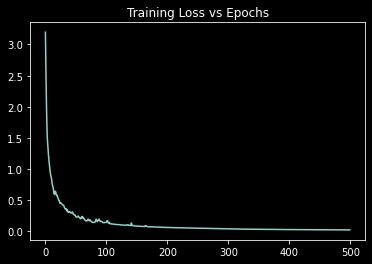

In [20]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)
plt.show()

In [21]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs == Y)/Y.shape[0]
    return acc
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9860
Test Acc 0.6742


In [22]:
from sklearn.metrics import confusion_matrix


In [25]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[157   0   1]
 [  0 135   1]
 [  3   0  59]]


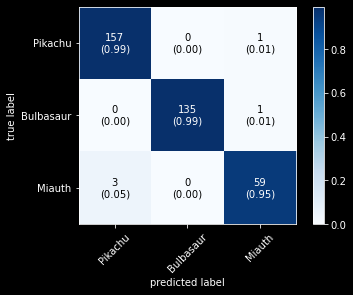

In [48]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=["Pikachu", "Bulbasaur","Miauth"])


In [26]:
from sklearn.metrics import classification_report
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       158
           1       1.00      0.99      1.00       136
           2       0.97      0.95      0.96        62

    accuracy                           0.99       356
   macro avg       0.98      0.98      0.98       356
weighted avg       0.99      0.99      0.99       356



In [46]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        42
           1       0.71      0.83      0.76        35
           2       0.11      0.08      0.10        12

    accuracy                           0.67        89
   macro avg       0.53      0.54      0.53        89
weighted avg       0.66      0.67      0.66        89



In [47]:
test_cnf_matrix = confusion_matrix(test_outputs,YTest)
print(test_cnf_matrix)

[[30  8  4]
 [ 2 29  4]
 [ 7  4  1]]


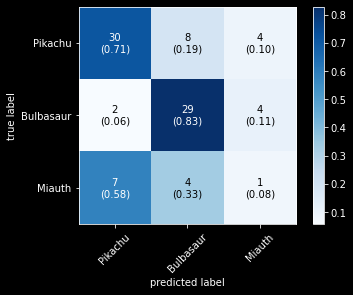

In [50]:
fig, ax = plot_confusion_matrix(conf_mat=test_cnf_matrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=["Pikachu", "Bulbasaur","Miauth"])

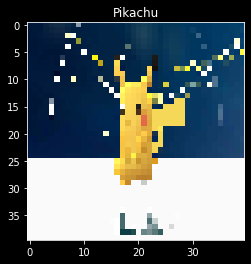

prediction 18 Meowth 


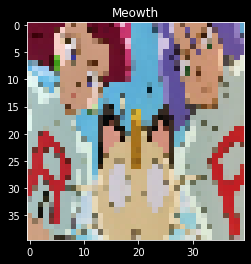

prediction 30 Bulbasaur 


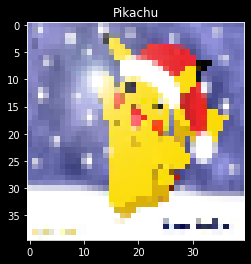

prediction 54 Meowth 


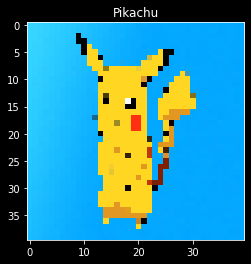

prediction 90 Meowth 


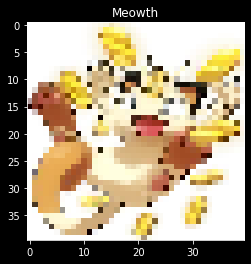

prediction 129 Pikachu 


In [52]:
#Visualising Misclassifications
for i in range (Y.shape[0]):
    if(Y[i] != outputs[i]):
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("prediction %d %s "%(i,label2pokemon[outputs[i]]))